In [1]:
# Import packages
import pandas as pd 
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Data from: 

https://data.austintexas.gov/Transportation-and-Mobility/Bluetooth-Travel-Sensors-Traffic-Match-Summary-Rec/v7zg-5jg9

This is by far the largest dataset. ~12 million rows

In [2]:
path = 'D:/Users/Bryan Lanier/Data/Traffic_Weather/'

In [3]:
df = pd.read_csv(path+'Bluetooth_Travel_Sensors_-Traffic_Match_Summary_Records__TMSR_.csv')
df.head()

,record_id,origin_reader_identifier,destination_reader_identifier,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,timestamp,average_travel_time_seconds,average_speed_mph,summary_interval_minutes,number_samples,standard_deviation
0,1452396600lamar_5thlamar_barton_springs,lamar_5th,lamar_barton_springs,Lamar,5th,Southbound,Lamar,Barton Springs,Northbound,0.691,01/10/2016 03:30:00 AM,79,31,15,1,0.00
1,1452396600lamar_rundberglamar_airport,lamar_rundberg,lamar_airport,Lamar,Rundberg,Southbound,Lamar,Airport,Northbound,2.230,01/10/2016 03:30:00 AM,202,40,15,1,0.00
2,1452396600lamar_parmerlamar_rundberg,lamar_parmer,lamar_rundberg,Lamar,Parmer,Southbound,Lamar,Rundberg,Northbound,3.310,01/10/2016 03:30:00 AM,539,22,15,1,0.00
3,1452396600congress_cesar_chavezcesar_chavez_re...,congress_cesar_chavez,cesar_chavez_red_river,Cesar chavez,Congress,Eastbound,Cesar chavez,Red River,Westbound,0.358,01/10/2016 03:30:00 AM,79,16,15,7,3.87
4,1452396600south_1st_stassneysouth_1st_st_elmo,south_1st_stassney,south_1st_st_elmo,South1st,Stassney,Northbound,South1st,St. Elmo,Southbound,1.010,01/10/2016 03:30:00 AM,81,45,15,1,0.00


In [4]:
df['timestamp'][0][11:]
# df['timestamp'][0][-2:]

'03:30:00 AM'

In [5]:
# Define function to extract date and time data from timestamp col 

def get_day(x):
    return int(x[3:5])

def get_month(x):
    return int(x[0:2])

def get_year(x):
    return int(x[6:10])

def get_time(t):
    return t[11:]

In [6]:
# Make those colums 

df['Day'] = df['timestamp'].apply(lambda x: get_day(x))
df['Month'] = df['timestamp'].apply(lambda x: get_month(x))
df['Year'] = df['timestamp'].apply(lambda x: get_year(x))
df['time'] = df['timestamp'].apply(lambda x: get_time(x))

df.head()

,record_id,origin_reader_identifier,destination_reader_identifier,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,timestamp,average_travel_time_seconds,average_speed_mph,summary_interval_minutes,number_samples,standard_deviation,Day,Month,Year,time
0,1452396600lamar_5thlamar_barton_springs,lamar_5th,lamar_barton_springs,Lamar,5th,Southbound,Lamar,Barton Springs,Northbound,0.691,01/10/2016 03:30:00 AM,79,31,15,1,0.00,10,1,2016,03:30:00 AM
1,1452396600lamar_rundberglamar_airport,lamar_rundberg,lamar_airport,Lamar,Rundberg,Southbound,Lamar,Airport,Northbound,2.230,01/10/2016 03:30:00 AM,202,40,15,1,0.00,10,1,2016,03:30:00 AM
2,1452396600lamar_parmerlamar_rundberg,lamar_parmer,lamar_rundberg,Lamar,Parmer,Southbound,Lamar,Rundberg,Northbound,3.310,01/10/2016 03:30:00 AM,539,22,15,1,0.00,10,1,2016,03:30:00 AM
3,1452396600congress_cesar_chavezcesar_chavez_re...,congress_cesar_chavez,cesar_chavez_red_river,Cesar chavez,Congress,Eastbound,Cesar chavez,Red River,Westbound,0.358,01/10/2016 03:30:00 AM,79,16,15,7,3.87,10,1,2016,03:30:00 AM
4,1452396600south_1st_stassneysouth_1st_st_elmo,south_1st_stassney,south_1st_st_elmo,South1st,Stassney,Northbound,South1st,St. Elmo,Southbound,1.010,01/10/2016 03:30:00 AM,81,45,15,1,0.00,10,1,2016,03:30:00 AM


In [7]:

datetime.datetime.today()
# datetime.datetime(2012, 3, 23, 23, 24, 55, 173504)
# datetime.datetime.today().weekday()

datetime.datetime(2018, 4, 14, 11, 23, 57, 352918)

In [8]:
test = datetime.datetime(2018, 4, 8)
test.weekday()

6

In [ ]:
def get_dow(x):
    day = x['Day']
    year = x['Year']
    month = x['Month']
    d = datetime.datetime(year, month, day)
    dow = d.weekday()
    return dow

In [ ]:
df['Day_of_week'] = df.apply(get_dow, axis=1)
df.head()

In [ ]:
df['Year'].value_counts()

In [ ]:
# View traffic based on year - see if its increasing over time
# This could be due to many reasons though - increased availability of sensors, etc. 

df.groupby('Year').count().number_samples.plot(kind='bar',figsize=(20,10))

In [ ]:
df.groupby('Year').count().number_samples.plot(kind='bar',figsize=(20,10))

In [ ]:
df.loc[df['Year']==2017]['Month'].value_counts()

We only have 2 months for 2017 - explains the low count for them 

In [ ]:
# Lets try looking at just jan&feb to see if its increasing over time 
df.loc[(df['Month'] == 1) | (df['Month'] == 2)].groupby('Year').sum().number_samples.plot(kind='bar',figsize=(20,10))

In [ ]:
df.loc[df['Year']==2016].shape[0]

# See if people speed more depending on the day of the week

In [ ]:
df.groupby('Day_of_week').mean().average_speed_mph.plot(kind='bar',figsize=(20,10))

# Compare traffic times to other dataset

In [ ]:
# Change the time bin to be in line with the actual time 
def get_hour(t):
    hr = t[0:2]
    if t[-2:] == 'AM':
        if hr == '12':
            return 0
        return int(hr)
    else:
        if hr != '12':
            return (int(hr)+12)
        return 12

def get_min(t):
    m = t[3:5]
    return int(m)

def convert_back(x):
    if x < 10:
        return '0'+str(x)
    return str(x)

In [ ]:
df['TB_hour'] = df['time'].apply(lambda x: get_hour(x))
df['TB_minute'] = df['time'].apply(lambda x: get_min(x))
df['TB_hour'] = df['TB_hour'].apply(lambda x: convert_back(x))
df['TB_minute'] = df['TB_minute'].apply(lambda x: str(x))
df['Time_Bin'] = df['TB_hour'] + ':' + df['TB_minute']
df.head()

In [ ]:
df.groupby('TB_hour').sum().number_samples.plot(kind='bar',figsize=(20,10))

# See which direction gets the most traffic

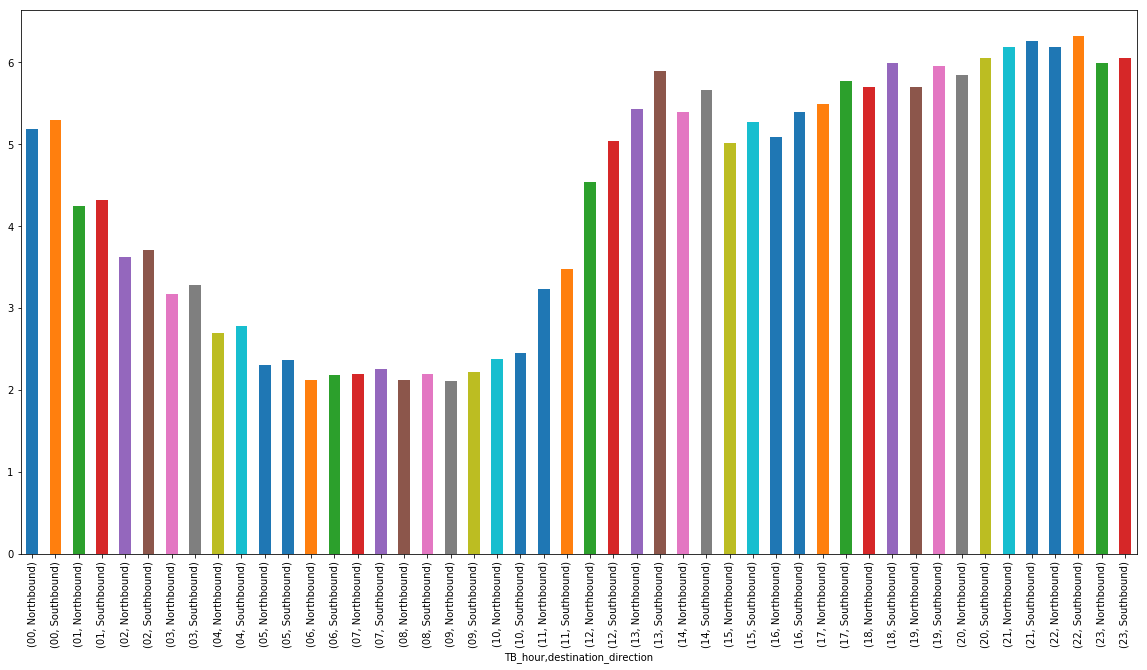

In [20]:
df.loc[(df['destination_direction'] == 'Northbound') | (df['destination_direction'] == 'Southbound')].groupby(['TB_hour','destination_direction']).mean().number_samples.plot(kind='bar',figsize=(20,10))

# Check traffic over the months 

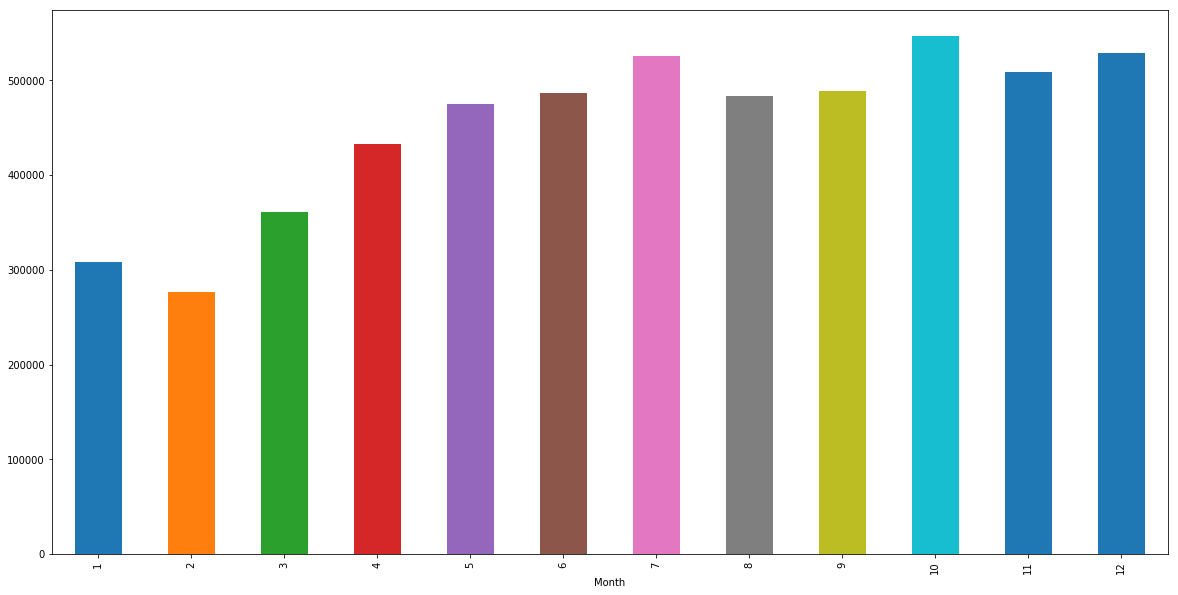

In [21]:
df.loc[df['Year']==2016].groupby('Month').sum().number_samples.plot(kind='bar',figsize=(20,10))

People don't like to drive in the cold months...see a huge spike in the summertime, and october (likley due to ACL)

# Avg samples by day of the week

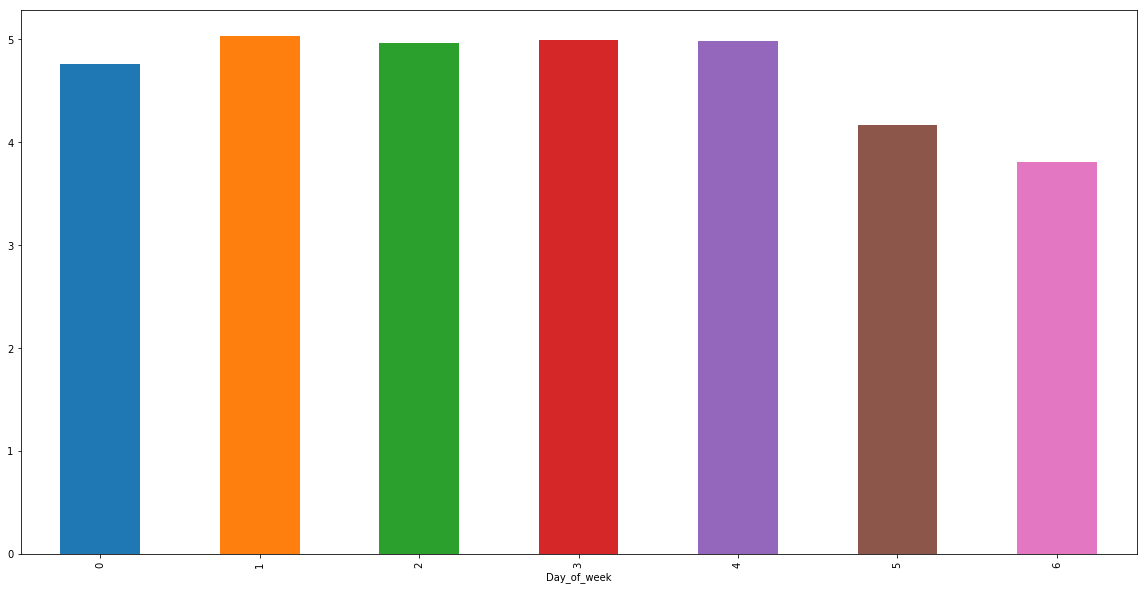

In [22]:
df.groupby('Day_of_week').mean().number_samples.plot(kind='bar',figsize=(20,10))

People drive less on the weekends, drive most on tuesday 

In [23]:
df.head()

,record_id,origin_reader_identifier,destination_reader_identifier,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,...,number_samples,standard_deviation,Day,Month,Year,time,Day_of_week,TB_hour,TB_minute,Time_Bin
0,1452396600lamar_5thlamar_barton_springs,lamar_5th,lamar_barton_springs,Lamar,5th,Southbound,Lamar,Barton Springs,Northbound,0.691,...,1,0.00,10,1,2016,03:30:00 AM,6,03,30,03:30
1,1452396600lamar_rundberglamar_airport,lamar_rundberg,lamar_airport,Lamar,Rundberg,Southbound,Lamar,Airport,Northbound,2.230,...,1,0.00,10,1,2016,03:30:00 AM,6,03,30,03:30
2,1452396600lamar_parmerlamar_rundberg,lamar_parmer,lamar_rundberg,Lamar,Parmer,Southbound,Lamar,Rundberg,Northbound,3.310,...,1,0.00,10,1,2016,03:30:00 AM,6,03,30,03:30
3,1452396600congress_cesar_chavezcesar_chavez_re...,congress_cesar_chavez,cesar_chavez_red_river,Cesar chavez,Congress,Eastbound,Cesar chavez,Red River,Westbound,0.358,...,7,3.87,10,1,2016,03:30:00 AM,6,03,30,03:30
4,1452396600south_1st_stassneysouth_1st_st_elmo,south_1st_stassney,south_1st_st_elmo,South1st,Stassney,Northbound,South1st,St. Elmo,Southbound,1.010,...,1,0.00,10,1,2016,03:30:00 AM,6,03,30,03:30


# Make a df for UT Area

In [24]:
# df.loc[(df['destination_roadway'] == 'Lamar')]['destination_cross_street'].value_counts()

In [ ]:
ut_df = df.loc[(df['destination_roadway'] == 'Lamar') & ((df['destination_cross_street'] == '24th') | (df['destination_cross_street'] == '29th'))]
ut_df.head()

In [ ]:
ut_df.groupby('Day_of_week').mean().number_samples.plot(kind='bar',figsize=(20,10))

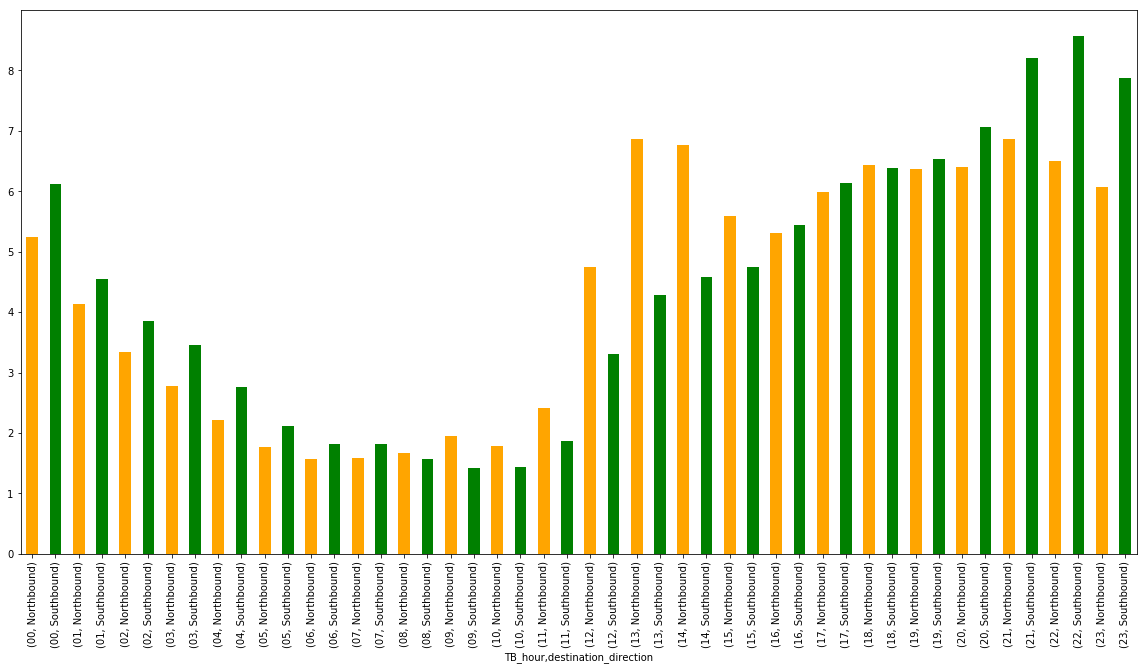

In [27]:
# colors = {'Northbound': 'r', 'Southbound': 'b'}
colors=['orange', 'g']*24


temp_df = ut_df.loc[(ut_df['destination_direction'] == 'Northbound') | (ut_df['destination_direction'] == 'Southbound')]
temp_df.groupby(['TB_hour','destination_direction']).mean().number_samples.plot.bar(stacked=True, color=colors,figsize=(20,10))

In [ ]:
ut_df.loc[df['Year']==2016].groupby('Month').sum().number_samples.plot(kind='bar',figsize=(20,10))

# Pulled Weather Data

In [29]:
w_df = pd.read_csv(path+'pulled_weather_data_2016.csv')
w_df = w_df.drop('Unnamed: 0', axis=1)
w_df.head()

,coolingdegreedays,coolingdegreedaysnormal,date,fog,gdegreedays,hail,heatingdegreedays,heatingdegreedaysnormal,humidity,maxdewpti,...,snowfallm,thunder,tornado,pretty,year,mon,mday,hour,min,tzname
0,0,0.0,"{'pretty': '12:00 PM CST on January 01, 2016',...",0,0,0,19,14.0,NaN,36,...,0.0,0,0,"12:00 PM CST on January 01, 2016",2016,1,1,12,0,America/Chicago
1,0,0.0,"{'pretty': '12:00 PM CST on January 02, 2016',...",0,0,0,20,14.0,NaN,42,...,0.0,0,0,"12:00 PM CST on January 02, 2016",2016,1,2,12,0,America/Chicago
2,0,0.0,"{'pretty': '12:00 PM CST on January 03, 2016',...",0,2,0,13,14.0,NaN,43,...,0.0,0,0,"12:00 PM CST on January 03, 2016",2016,1,3,12,0,America/Chicago
3,0,0.0,"{'pretty': '12:00 PM CST on January 04, 2016',...",0,0,0,17,14.0,NaN,33,...,0.0,0,0,"12:00 PM CST on January 04, 2016",2016,1,4,12,0,America/Chicago
4,0,0.0,"{'pretty': '12:00 PM CST on January 05, 2016',...",0,0,0,19,14.0,NaN,40,...,0.0,0,0,"12:00 PM CST on January 05, 2016",2016,1,5,12,0,America/Chicago


In [30]:
list(w_df)

['coolingdegreedays',
 'coolingdegreedaysnormal',
 'date',
 'fog',
 'gdegreedays',
 'hail',
 'heatingdegreedays',
 'heatingdegreedaysnormal',
 'humidity',
 'maxdewpti',
 'maxdewptm',
 'maxhumidity',
 'maxpressurei',
 'maxpressurem',
 'maxtempi',
 'maxtempm',
 'maxvisi',
 'maxvism',
 'maxwspdi',
 'maxwspdm',
 'meandewpti',
 'meandewptm',
 'meanpressurei',
 'meanpressurem',
 'meantempi',
 'meantempm',
 'meanvisi',
 'meanvism',
 'meanwdird',
 'meanwdire',
 'meanwindspdi',
 'meanwindspdm',
 'mindewpti',
 'mindewptm',
 'minhumidity',
 'minpressurei',
 'minpressurem',
 'mintempi',
 'mintempm',
 'minvisi',
 'minvism',
 'minwspdi',
 'minwspdm',
 'monthtodatecoolingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'monthtodateheatingdegreedays',
 'monthtodateheatingdegreedaysnormal',
 'monthtodatesnowfalli',
 'monthtodatesnowfallm',
 'precipi',
 'precipm',
 'precipsource',
 'rain',
 'since1jancoolingdegreedays',
 'since1jancoolingdegreedaysnormal',
 'since1julheatingdegreedays',
 'since1julh

In [31]:
woi_df_days = []
for i in range(0, 366):
    woi_df_days.append(i)

In [32]:
woi_df = w_df[['year', 'mon', 'mday','fog', 'hail', 'rain', 'snow','thunder','maxtempi', 'mintempi', 'meantempi', 'maxhumidity', 'minhumidity', 'maxwspdi',
              'minwspdi', 'meanwindspdi', 'meanvisi']].copy()
woi_df=woi_df.rename(columns = {'year':'Year', 'mon':'Month', 'mday':'Day'})
woi_df['day_of_year'] = woi_df_days
woi_df['meanhumidity'] = (woi_df['maxhumidity'] + woi_df['minhumidity']) / 2
print(woi_df.shape)
woi_df.head()

(366, 19)


,Year,Month,Day,fog,hail,rain,snow,thunder,maxtempi,mintempi,meantempi,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,day_of_year,meanhumidity
0,2016,1,1,0,0,1,0,0,48,44,46,66,53,15,5,8,NaN,0,59.5
1,2016,1,2,0,0,1,0,0,47,42,45,100,53,8,0,2,NaN,1,76.5
2,2016,1,3,0,0,1,0,0,62,41,52,96,43,9,0,3,10.0,2,69.5
3,2016,1,4,0,0,0,0,0,58,37,48,79,36,9,0,4,10.0,3,57.5
4,2016,1,5,0,0,1,0,0,56,36,46,85,51,9,0,3,10.0,4,68.0


# Some fun Weather EDA 

In [33]:
import seaborn 

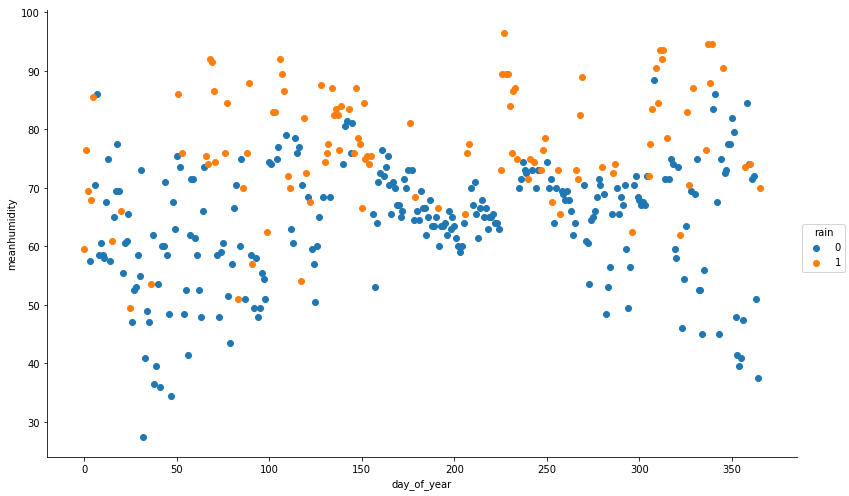

In [34]:
# Rainy days in 2016 
plot_df = woi_df[['day_of_year', 'meanhumidity', 'rain']]
fg = seaborn.FacetGrid(data=plot_df, hue='rain', aspect=1.61, size=(7))
fg.map(plt.scatter, 'day_of_year', 'meanhumidity').add_legend()

In [35]:
lin_reg = LinearRegression()

In [36]:
seaborn

<module 'seaborn' from 'C:\\Users\\Bryan Lanier\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

# Do the merge on date 
full_df = df.merge(weather_df2, on=['Year', 'Month', 'Day'], how='left') 

In [37]:
temp_df = df.loc[df['Year'] == 2016]
temp_df.shape

(5421756, 24)

In [38]:
full_df = temp_df.merge(woi_df, on=['Year', 'Month', 'Day'], how='left')
print(full_df.shape)
del temp_df
full_df.head()

(5421756, 40)


,record_id,origin_reader_identifier,destination_reader_identifier,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,...,mintempi,meantempi,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,day_of_year,meanhumidity
0,1452396600lamar_5thlamar_barton_springs,lamar_5th,lamar_barton_springs,Lamar,5th,Southbound,Lamar,Barton Springs,Northbound,0.691,...,33,42,82,39,12,0,4,10.0,9,60.5
1,1452396600lamar_rundberglamar_airport,lamar_rundberg,lamar_airport,Lamar,Rundberg,Southbound,Lamar,Airport,Northbound,2.230,...,33,42,82,39,12,0,4,10.0,9,60.5
2,1452396600lamar_parmerlamar_rundberg,lamar_parmer,lamar_rundberg,Lamar,Parmer,Southbound,Lamar,Rundberg,Northbound,3.310,...,33,42,82,39,12,0,4,10.0,9,60.5
3,1452396600congress_cesar_chavezcesar_chavez_re...,congress_cesar_chavez,cesar_chavez_red_river,Cesar chavez,Congress,Eastbound,Cesar chavez,Red River,Westbound,0.358,...,33,42,82,39,12,0,4,10.0,9,60.5
4,1452396600south_1st_stassneysouth_1st_st_elmo,south_1st_stassney,south_1st_st_elmo,South1st,Stassney,Northbound,South1st,St. Elmo,Southbound,1.010,...,33,42,82,39,12,0,4,10.0,9,60.5


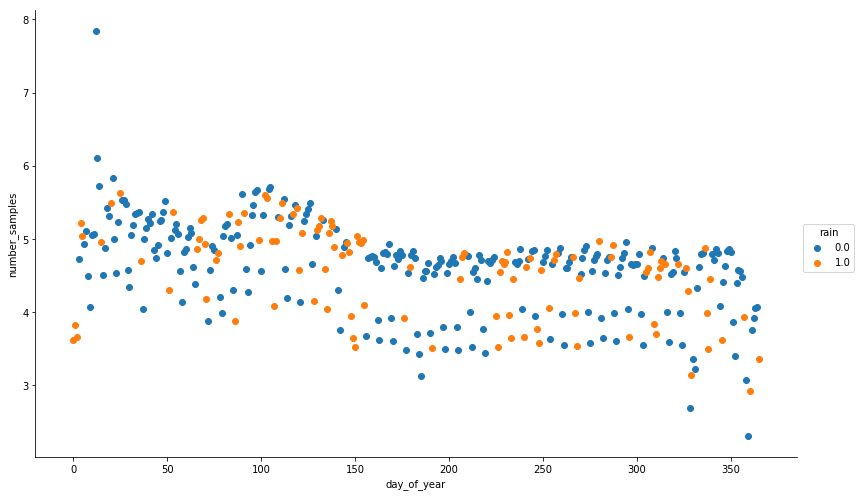

In [39]:
plot_df = full_df.groupby('day_of_year', as_index=False).mean()[['day_of_year', 'number_samples', 'rain']]
fg = seaborn.FacetGrid(data=plot_df, hue='rain', aspect=1.61, size=(7))
fg.map(plt.scatter, 'day_of_year', 'number_samples').add_legend()

In [40]:
woi_df.head()

,Year,Month,Day,fog,hail,rain,snow,thunder,maxtempi,mintempi,meantempi,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,day_of_year,meanhumidity
0,2016,1,1,0,0,1,0,0,48,44,46,66,53,15,5,8,NaN,0,59.5
1,2016,1,2,0,0,1,0,0,47,42,45,100,53,8,0,2,NaN,1,76.5
2,2016,1,3,0,0,1,0,0,62,41,52,96,43,9,0,3,10.0,2,69.5
3,2016,1,4,0,0,0,0,0,58,37,48,79,36,9,0,4,10.0,3,57.5
4,2016,1,5,0,0,1,0,0,56,36,46,85,51,9,0,3,10.0,4,68.0


In [41]:
# Define 'nice' weather 

# maxtemp < 85
# mintemp > 59
# minhumidity < 40

full_df.loc[(full_df['maxtempi'] < 85) & (full_df['mintempi'] > 59) & (full_df['minhumidity'] < 40)].shape[0]

75288

In [42]:
full_df['nw1'] = (((85 - full_df['maxtempi']) / abs(85 - full_df['maxtempi'])) + 1 ) / 2
full_df['nw2'] = (((full_df['mintempi'] - 59) / abs(full_df['mintempi'] - 59)) + 1) / 2
full_df['nw3'] = (((40 - full_df['minhumidity']) / abs(40 - full_df['minhumidity'])) + 1 ) / 2

full_df['nw1'] = full_df['nw1'].fillna(1) # Fill the cusp values in as true 
full_df['nw2'] = full_df['nw2'].fillna(1) # Fill the cusp values in as true 
full_df['nw3'] = full_df['nw3'].fillna(1) # Fill the cusp values in as true 

full_df['nice_weather1'] = full_df['nw1'] * full_df['nw2'] * full_df['nw3']
full_df['nice_weather2'] = full_df['nw2'] * full_df['nw3']

del full_df['nw1']
del full_df['nw2']
del full_df['nw3']

print(full_df.loc[full_df['nice_weather1']==1].shape[0])
print(full_df.loc[full_df['nice_weather2']==1].shape[0])
full_df.head()

100941
745719


,record_id,origin_reader_identifier,destination_reader_identifier,origin_roadway,origin_cross_street,origin_direction,destination_roadway,destination_cross_street,destination_direction,segment_length_miles,...,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,day_of_year,meanhumidity,nice_weather1,nice_weather2
0,1452396600lamar_5thlamar_barton_springs,lamar_5th,lamar_barton_springs,Lamar,5th,Southbound,Lamar,Barton Springs,Northbound,0.691,...,82,39,12,0,4,10.0,9,60.5,0.0,0.0
1,1452396600lamar_rundberglamar_airport,lamar_rundberg,lamar_airport,Lamar,Rundberg,Southbound,Lamar,Airport,Northbound,2.230,...,82,39,12,0,4,10.0,9,60.5,0.0,0.0
2,1452396600lamar_parmerlamar_rundberg,lamar_parmer,lamar_rundberg,Lamar,Parmer,Southbound,Lamar,Rundberg,Northbound,3.310,...,82,39,12,0,4,10.0,9,60.5,0.0,0.0
3,1452396600congress_cesar_chavezcesar_chavez_re...,congress_cesar_chavez,cesar_chavez_red_river,Cesar chavez,Congress,Eastbound,Cesar chavez,Red River,Westbound,0.358,...,82,39,12,0,4,10.0,9,60.5,0.0,0.0
4,1452396600south_1st_stassneysouth_1st_st_elmo,south_1st_stassney,south_1st_st_elmo,South1st,Stassney,Northbound,South1st,St. Elmo,Southbound,1.010,...,82,39,12,0,4,10.0,9,60.5,0.0,0.0


In [43]:
# test = full_df.groupby('day_of_year', as_index=False).mean()
# test = test.loc[test['nice_weather2'] == 1]
# test[['maxwspdi','minwspdi', 'meanwindspdi']]

In [44]:
woi_df['maxwspdi'].mean()

12.693989071038251

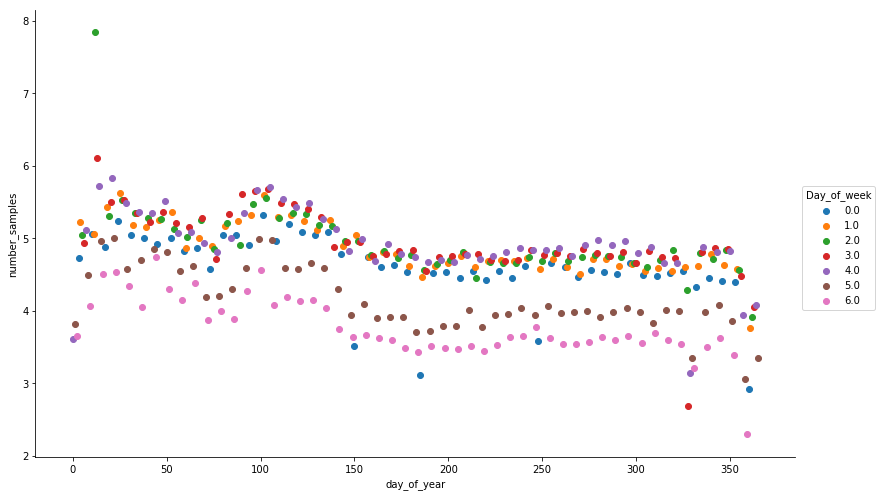

In [45]:
plot_df = full_df.groupby('day_of_year', as_index=False).mean()[['day_of_year', 'number_samples', 'Day_of_week']]
fg = seaborn.FacetGrid(data=plot_df, hue='Day_of_week', aspect=1.61, size=(7))
fg.map(plt.scatter, 'day_of_year', 'number_samples').add_legend()

In [46]:
full_df.groupby('day_of_year', as_index=False).mean()['nice_weather1'].sum() # Only 7 'nice' days in 2016

7.0

In [47]:
full_df.groupby('day_of_year', as_index=False).mean()['nice_weather2'].sum() #47 

47.0

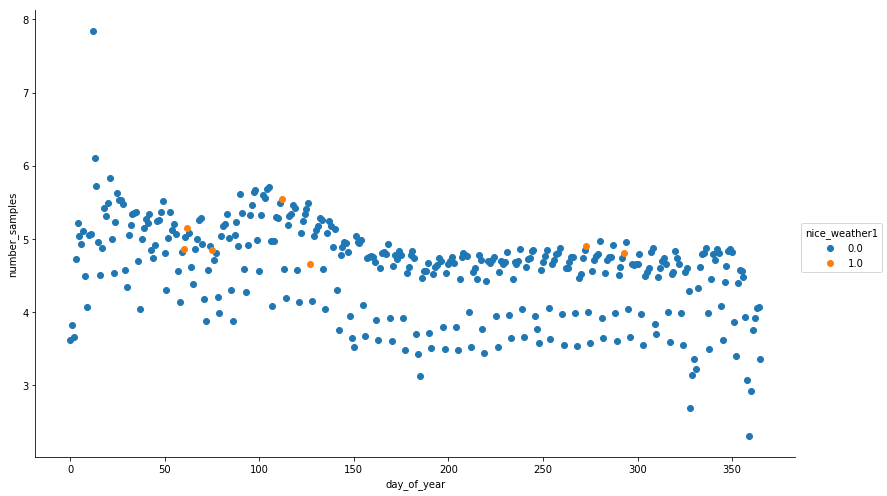

In [48]:
plot_df = full_df.groupby('day_of_year', as_index=False).mean()[['day_of_year', 'number_samples', 'nice_weather1']]
fg = seaborn.FacetGrid(data=plot_df, hue='nice_weather1', aspect=1.61, size=(7))
fg.map(plt.scatter, 'day_of_year', 'number_samples').add_legend()

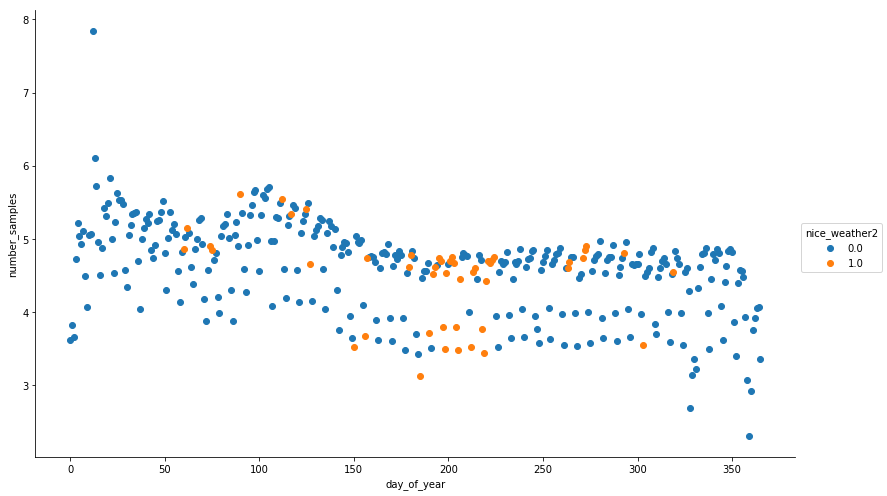

In [49]:
plot_df = full_df.groupby('day_of_year', as_index=False).mean()[['day_of_year', 'number_samples', 'nice_weather2']]
fg = seaborn.FacetGrid(data=plot_df, hue='nice_weather2', aspect=1.61, size=(7))
fg.map(plt.scatter, 'day_of_year', 'number_samples').add_legend()

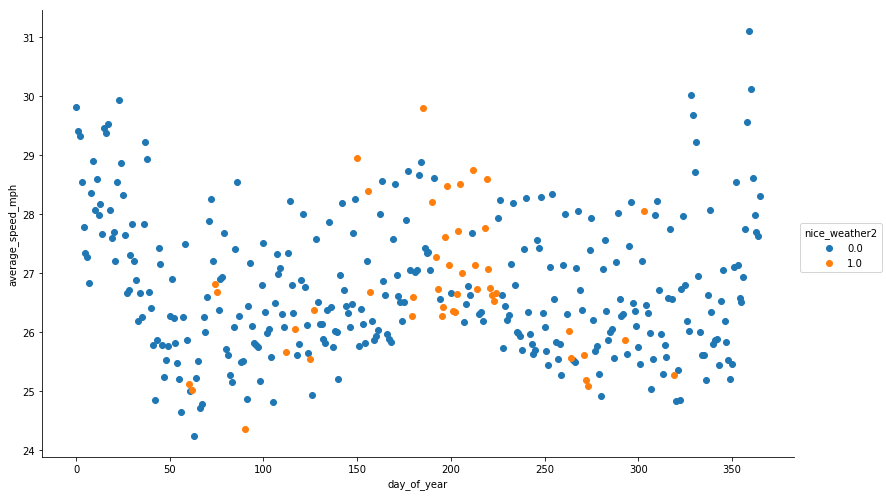

In [50]:
# Do people slow down if its raining ? Fogging?  Thundering ? 
plot_df = full_df.groupby('day_of_year', as_index=False).mean()[['day_of_year', 'average_speed_mph', 'nice_weather2', 'Day_of_week']]
# plot_df = plot_df.loc[plot_df['Day_of_week'] == 5]
del plot_df['Day_of_week']
fg = seaborn.FacetGrid(data=plot_df, hue='nice_weather2', aspect=1.61, size=(7))
fg.map(plt.scatter, 'day_of_year', 'average_speed_mph').add_legend()


In [51]:
# Whats going on ~day 170 
test = full_df.groupby('day_of_year', as_index=False).mean()
test.loc[test['average_speed_mph'] > 28.5][['average_speed_mph', 'Day', 'Month', 'Year', 'Day_of_week']]

,average_speed_mph,Day,Month,Year,Day_of_week
0,29.811953,1.0,1.0,2016.0,4.0
1,29.402791,2.0,1.0,2016.0,5.0
2,29.326770,3.0,1.0,2016.0,6.0
3,28.550371,4.0,1.0,2016.0,0.0
9,28.903213,10.0,1.0,2016.0,6.0
11,28.587722,12.0,1.0,2016.0,1.0
15,29.460592,16.0,1.0,2016.0,5.0
16,29.370509,17.0,1.0,2016.0,6.0
17,29.529658,18.0,1.0,2016.0,0.0
22,28.538950,23.0,1.0,2016.0,5.0


People Speed on New Years, July 4th, Thanksgiving, and Christmas (and the days leading to/after)

Also speed on 2/7 - not sure why.  Perhaps because week before valentines day 

In [52]:
test.loc[(test['Day'] == 14) & (test['Month'] == 2)]['average_speed_mph']

44    27.430126
Name: average_speed_mph, dtype: float64

In [53]:
test.loc[test['number_samples'] > 7]

,day_of_year,segment_length_miles,average_travel_time_seconds,average_speed_mph,summary_interval_minutes,number_samples,standard_deviation,Day,Month,Year,...,meantempi,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,meanhumidity,nice_weather1,nice_weather2
12,12,0.976078,136.895863,27.981671,25.210936,7.846815,4.559383,13.0,1.0,2016.0,...,52.0,92.0,43.0,10.0,0.0,2.0,10.0,67.5,0.0,0.0


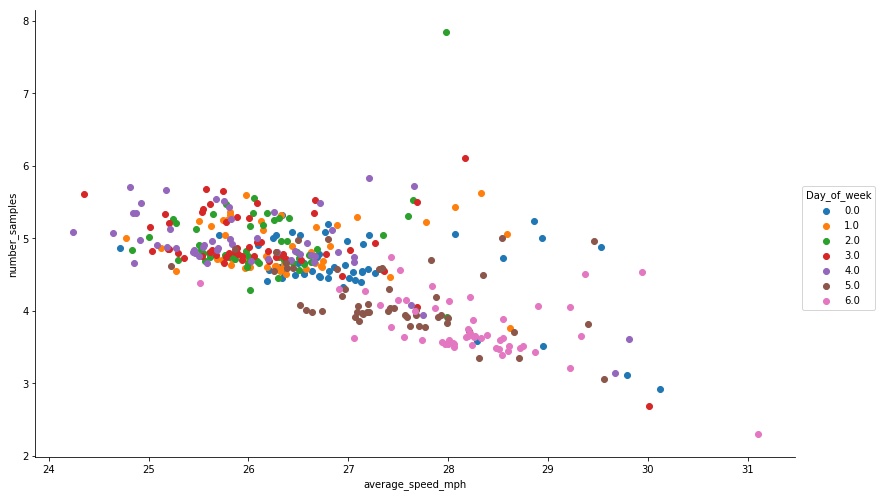

In [54]:
# Now im curious...plot avg speed vs count with day of week as hue 
plot_df = full_df.groupby('day_of_year', as_index=False).mean()[['average_speed_mph', 'number_samples', 'Day_of_week']]
# plot_df = plot_df.loc[plot_df['Day_of_week'] == 5]
# del plot_df['Day_of_week']
fg = seaborn.FacetGrid(data=plot_df, hue='Day_of_week', aspect=1.61, size=(7))
fg.map(plt.scatter, 'average_speed_mph', 'number_samples').add_legend()

In [55]:
for d in range(0, 7):
    print(d, test.loc[test['Day_of_week']==d].average_speed_mph.mean())

0 27.02723155678573
1 26.353010661183678
2 26.168677055517126
3 26.10893719272133
4 26.05393741172605
5 27.401459340903994
6 28.206584826272845


People go faster on Weekends and Mondays.  Go slowest on Fridays.

# Create X+y and model 

In [132]:
# Try with all of austin first 
X = full_df.groupby('day_of_year', as_index=False).mean()
X.head()

,day_of_year,segment_length_miles,average_travel_time_seconds,average_speed_mph,summary_interval_minutes,number_samples,standard_deviation,Day,Month,Year,...,meantempi,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,meanhumidity,nice_weather1,nice_weather2
0,0,0.902989,111.393591,29.811953,15.0,3.607975,4.043137,1.0,1.0,2016.0,...,46.0,66.0,53.0,15.0,5.0,8.0,NaN,59.5,0.0,0.0
1,1,0.941891,122.490953,29.402791,15.0,3.815207,4.173207,2.0,1.0,2016.0,...,45.0,100.0,53.0,8.0,0.0,2.0,NaN,76.5,0.0,0.0
2,2,0.906301,114.956472,29.326770,15.0,3.653747,4.035628,3.0,1.0,2016.0,...,52.0,96.0,43.0,9.0,0.0,3.0,10.0,69.5,0.0,0.0
3,3,0.920005,123.761641,28.550371,15.0,4.718833,4.423983,4.0,1.0,2016.0,...,48.0,79.0,36.0,9.0,0.0,4.0,10.0,57.5,0.0,0.0
4,4,0.959676,132.521394,27.780079,15.0,5.215996,4.579017,5.0,1.0,2016.0,...,46.0,85.0,51.0,9.0,0.0,3.0,10.0,68.0,0.0,0.0


In [133]:
y = full_df.groupby('day_of_year', as_index=False).mean().number_samples.values
# y

In [134]:
X.loc[X['nice_weather2']==1].shape[0]

47

In [135]:
X_metrics_num = [
#  'maxtempi',
#  'mintempi',
 'meantempi', # try commencting out certain metrics that are liekly to be collinear 
#  'maxhumidity',
#  'minhumidity',
#  'maxwspdi',
#  'minwspdi',
#  'meanwindspdi',
 'meanhumidity']

X_d_cat = ['Month', 'Day_of_week']
X_metrics_cat = ['rain']#,
#  'hail', #never hailed in 2016
#  'fog',
#  'snow']
#  'thunder']#,
#  'nice_weather1',
#  'nice_weather2']

In [136]:
X_num = X[X_metrics_num]
X_cat = X[X_metrics_cat]
X_d_cat = X[X_d_cat]
X_num.head()

,meantempi,meanhumidity
0,46.0,59.5
1,45.0,76.5
2,52.0,69.5
3,48.0,57.5
4,46.0,68.0


In [137]:
X_cat.head()

,rain
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0


In [138]:
X_d_cat.head()

,Month,Day_of_week
0,1.0,4.0
1,1.0,5.0
2,1.0,6.0
3,1.0,0.0
4,1.0,1.0


Make dummies for the X vars that need it 

[Month, Day_of_week]

In [139]:
dummy_month = pd.get_dummies(X_d_cat['Month'], prefix='Month')
dummy_dow = pd.get_dummies(X_d_cat['Day_of_week'], prefix='day_of_week')

In [140]:
temp_X_cat_dummy = pd.concat([dummy_month, dummy_dow], axis=1)
print(temp_X_cat_dummy.shape)
temp_X_cat_dummy.head()

(366, 19)


,Month_1.0,Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [141]:
print(X_cat.shape, temp_X_cat_dummy.shape)
X_cat_dummy = pd.concat([X_cat, temp_X_cat_dummy], axis=1)
# X_cat_dummy['Raining_and_weekend'] = X_cat_dummy['rain'] * (X_cat_dummy['day_of_week_5.0'] + X_cat_dummy['day_of_week_6.0'])
# X_cat_dummy['fog_and_weekend'] = X_cat_dummy['fog'] * (X_cat_dummy['day_of_week_5.0'] + X_cat_dummy['day_of_week_6.0'])
# X_cat_dummy['nice_weather_weekend'] = X_cat_dummy['nice_weather2'] * (X_cat_dummy['day_of_week_5.0'] + X_cat_dummy['day_of_week_6.0'])
# del X_cat_dummy['nice_weather2']
# del X_cat_dummy['fog']
print(X_cat_dummy.shape)
X_cat_dummy.head()

(366, 1) (366, 19)
(366, 20)


,rain,Month_1.0,Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0
0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [142]:
# Scale the X num data
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

X_num_scaled = std_scale.fit_transform(X_num)
# X_num_scaled

In [143]:
# X_clean = np.concatenate([X_num_scaled, X_cat_dummy], axis=1)
X_clean = pd.concat([X_num, X_cat_dummy], axis=1)
X_clean

,meantempi,meanhumidity,rain,Month_1.0,Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,Month_7.0,...,Month_10.0,Month_11.0,Month_12.0,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0
0,46.0,59.5,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,45.0,76.5,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,52.0,69.5,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,48.0,57.5,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46.0,68.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,50.0,85.5,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,61.0,70.5,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,55.0,86.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,48.0,58.5,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,42.0,60.5,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
col_names = list(X_num) + list(X_cat_dummy)
# col_names

# Run Linear Regression

In [145]:
from sklearn.metrics import explained_variance_score

In [146]:
import statsmodels.api as sm
from scipy import stats

# X2 = sm.add_constant(X)
est = sm.OLS(y, X_clean)
est2 = est.fit()
print(est2.summary(xname = col_names))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     56.31
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           9.93e-96
Time:                        07:22:32   Log-Likelihood:                -80.186
No. Observations:                 366   AIC:                             202.4
Df Residuals:                     345   BIC:                             284.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
meantempi          -0.0097      0.003     

In [147]:
## Lets see how well just the weather data does 
# X_weather = np.concatenate([X_num_scaled, X_cat], axis=1)
X_weather = np.concatenate([X_num, X_cat], axis=1)
lin_reg_weather = LinearRegression()
lin_reg_weather.fit(X_weather, y)

y_pred_weather = lin_reg_weather.predict(X_weather)
mean_squared_error(y, y_pred_weather)

0.368614155845276

In [148]:
# X2 = sm.add_constant(X_num_scaled)
X2 = sm.add_constant(X_num)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary(xname = list(X_num)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     9.033
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           0.000148
Time:                        07:23:11   Log-Likelihood:                -336.70
No. Observations:                 366   AIC:                             679.4
Df Residuals:                     363   BIC:                             691.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
meantempi        5.5664      0.231     24.092   

In [149]:
# How well do just our calendar data predict traffic? 
lin_reg_cal = LinearRegression(fit_intercept=False)
lin_reg_cal.fit(temp_X_cat_dummy, y)

y_pred_cal = lin_reg_cal.predict(temp_X_cat_dummy)
mean_squared_error(y, y_pred_cal)

0.0951120999371306

In [150]:
est = sm.OLS(y, temp_X_cat_dummy)
est2 = est.fit()
print(est2.summary(xname = list(temp_X_cat_dummy)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     62.81
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           6.05e-95
Time:                        07:23:21   Log-Likelihood:                -88.788
No. Observations:                 366   AIC:                             213.6
Df Residuals:                     348   BIC:                             283.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Month_1.0           2.1753      0.055     

# Using more raw weather data
Try standardizing values with respect to the month and day of week they are in

In [654]:
def zscore(metric, df):
    
#     groupby_metric = ['dow', 'mon']
    groupby_metric = 'dow'
    
    val_list = []
    
#     means = df.groupby(groupby_metric, as_index=False)[metric].mean()
#     stds = df.groupby(groupby_metric)[metric].std()
#     stds = stds.reset_index()

    means = df.groupby(groupby_metric)[metric].mean()
    stds = df.groupby(groupby_metric)[metric].std()
    
    for i in range(df.shape[0]):
        dep = df.loc[i, groupby_metric]
        z = (df.loc[i, metric] - means.loc[dep]) / stds.loc[dep]

        val_list.append(z)

##### uncomment lines below to group on both dow and mon 

#         dow = df.loc[i, groupby_metric[0]] #HARD CODINGGG
#         mon = df.loc[i, groupby_metric[1]]
        
#         curr_mean = means.loc[(means[groupby_metric[0]] == dow) & (means[groupby_metric[1]] == mon)][metric].values[0]
#         curr_std = stds.loc[(stds[groupby_metric[0]] == dow) & (stds[groupby_metric[1]] == mon)][metric].values[0]
#         curr_val = df.loc[i, metric]
#         z = (curr_val - curr_mean) / curr_std
        
#         val_list.append(z)
    
    return val_list

In [479]:
groupby_metric = ['dow', 'mon']
metric = 'maxtempi'
means = woi_df2.groupby(groupby_metric, as_index=False)[metric].mean()
dow = woi_df2.loc[0, groupby_metric[0]] #HARD CODINGGG
mon = woi_df2.loc[0, groupby_metric[1]]
# curr_mean = means.loc[(means[groupby_metric[0] == dow]) & (means[groupby_metric[1] == mon])][metric].values[0]

In [485]:
means.loc[(means['dow'] == 'Fri') & (means['mon'] == 1)]['maxtempi'].values[0]

62.8

In [470]:
test11 = woi_df2.groupby(['dow', 'mon'])['minhumidity'].std()
test11 = test11.reset_index()
test11.loc[(test11['dow'] == 'Fri') & (test11['mon'] == 1)]['minhumidity'].values[0]
test11.head()

woi_df2.iloc[0]['minhumidity']

53

In [347]:
y = full_df.groupby('day_of_year', as_index=False).mean().number_samples.values

In [343]:
day_of_week_list = ['Fri', 'Sat', 'Sunday', 'Mon', 'Tues', 'Wed', 'Thurs']
day_of_week_list = day_of_week_list*53
dowlist2 = day_of_week_list[0:366]

In [637]:
woi_df2 = woi_df = w_df[['year', 'mon', 'mday','fog', 'hail', 'rain', 'snow','thunder','maxtempi', 'mintempi', 'meantempi', 'maxhumidity', 'minhumidity', 'maxwspdi',
              'minwspdi', 'meanwindspdi', 'meanvisi', 'maxvisi', 'minvisi']].copy()
woi_df2['day_of_year'] = woi_df_days
woi_df2['meanhumidity'] = (woi_df2['maxhumidity'] + woi_df2['minhumidity']) / 2
woi_df2['dow'] = dowlist2
woi_df2 = woi_df2.fillna(method='bfill')
woi_df2['traffic_vol'] = y
# woi_df2 = woi_df2.loc[woi_df2['day_of_year'].isin(weekend_days)]
woi_df2.head()

,year,mon,mday,fog,hail,rain,snow,thunder,maxtempi,mintempi,...,maxwspdi,minwspdi,meanwindspdi,meanvisi,maxvisi,minvisi,day_of_year,meanhumidity,dow,traffic_vol
0,2016,1,1,0,0,1,0,0,48,44,...,15,5,8,10.0,10.0,10.0,0,59.5,Fri,3.607975
1,2016,1,2,0,0,1,0,0,47,42,...,8,0,2,10.0,10.0,10.0,1,76.5,Sat,3.815207
2,2016,1,3,0,0,1,0,0,62,41,...,9,0,3,10.0,10.0,10.0,2,69.5,Sunday,3.653747
3,2016,1,4,0,0,0,0,0,58,37,...,9,0,4,10.0,10.0,10.0,3,57.5,Mon,4.718833
4,2016,1,5,0,0,1,0,0,56,36,...,9,0,3,10.0,10.0,10.0,4,68.0,Tues,5.215996


In [618]:
moi =['maxtempi',
 'mintempi',
 'meantempi',
#  'maxhumidity',
#  'minhumidity',
#  'maxwspdi',
#  'minwspdi',
 'meanwindspdi',
 'meanvisi',
#  'maxvisi',
#  'minvisi',
 'meanhumidity',
 'traffic_vol']

moi_zscore = []
for m in moi:
    moi_zscore.append(m+'_zscore')

In [564]:
woi_df2_std = woi_df2.copy()
woi_df2_std = woi_df2_std.drop(['maxvisi'], axis=1) #hard code a drop, all values = 10 (no std)

for metric in moi:
    woi_df2_std[metric+'_zscore'] = zscore(metric, woi_df2)
    
woi_df2_std = woi_df2_std.fillna(0) # Fill with 0s, had no std
woi_df2_std.head()

,year,mon,mday,fog,hail,rain,snow,thunder,maxtempi,mintempi,...,meanhumidity,dow,traffic_vol,maxtempi_zscore,mintempi_zscore,meantempi_zscore,meanwindspdi_zscore,meanvisi_zscore,meanhumidity_zscore,traffic_vol_zscore
0,2016,1,1,0,0,1,0,0,48,44,...,59.5,Fri,3.607975,-2.292668,-1.201973,-1.839256,2.077297,0.571144,-0.598755,-2.706887
1,2016,1,2,0,0,1,0,0,47,42,...,76.5,Sat,3.815207,-2.431307,-1.296963,-1.915950,-1.343539,0.561600,0.659682,-0.772600
2,2016,1,3,0,0,1,0,0,62,41,...,69.5,Sunday,3.653747,-1.349475,-1.390186,-1.396686,-0.842703,0.487196,-0.061642,-0.305147
3,2016,1,4,0,0,0,0,0,58,37,...,57.5,Mon,4.718833,-1.768510,-1.779055,-1.817219,-0.330563,0.526382,-0.827519,0.227586
4,2016,1,5,0,0,1,0,0,56,36,...,68.0,Tues,5.215996,-2.193324,-1.978696,-2.182421,-0.819017,0.703728,0.013618,1.005114


In [565]:
# for col in list(woi_df2_std):
#     print(col)
#     print(woi_df2_std[col].isna().value_counts())

In [566]:
# Extract the target out of there 
y_std = woi_df2_std['traffic_vol_zscore']

In [655]:
X3 = woi_df2.drop(['year', 'mon', 'mday', 'day_of_year', 'dow', 'traffic_vol'], axis=1)
y3 = zscore('traffic_vol', woi_df2)
X3.head()

,fog,hail,rain,snow,thunder,maxtempi,mintempi,meantempi,maxhumidity,minhumidity,maxwspdi,minwspdi,meanwindspdi,meanvisi,maxvisi,minvisi,meanhumidity
0,0,0,1,0,0,48,44,46,66,53,15,5,8,10.0,10.0,10.0,59.5
1,0,0,1,0,0,47,42,45,100,53,8,0,2,10.0,10.0,10.0,76.5
2,0,0,1,0,0,62,41,52,96,43,9,0,3,10.0,10.0,10.0,69.5
3,0,0,0,0,0,58,37,48,79,36,9,0,4,10.0,10.0,10.0,57.5
4,0,0,1,0,0,56,36,46,85,51,9,0,3,10.0,10.0,10.0,68.0


In [573]:
X2 = woi_df2_std[moi_zscore].copy()
X2 = X2.drop(['traffic_vol_zscore'], axis=1)
X2.head()

,maxtempi_zscore,mintempi_zscore,meantempi_zscore,meanwindspdi_zscore,meanvisi_zscore,meanhumidity_zscore
0,-2.292668,-1.201973,-1.839256,2.077297,0.571144,-0.598755
1,-2.431307,-1.296963,-1.915950,-1.343539,0.561600,0.659682
2,-1.349475,-1.390186,-1.396686,-0.842703,0.487196,-0.061642
3,-1.768510,-1.779055,-1.817219,-0.330563,0.526382,-0.827519
4,-2.193324,-1.978696,-2.182421,-0.819017,0.703728,0.013618


In [574]:
# # X2_wint = sm.add_constant(X2)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())#(xname = list(X_num)))

In [656]:
md = 5
dtr_weather = DecisionTreeRegressor(max_depth = md, criterion='mse', min_samples_leaf=12) #MAE gets lower R2, but has more interesting splits 
dtr_weather.fit(X3, y3)

#friedman_mse

y_pred_tree = dtr_weather.predict(X3)
print(mean_squared_error(y_std, y_pred_tree))
print(explained_variance_score(y_std, y_pred_tree))

0.6942661406667444
0.29219663653474015


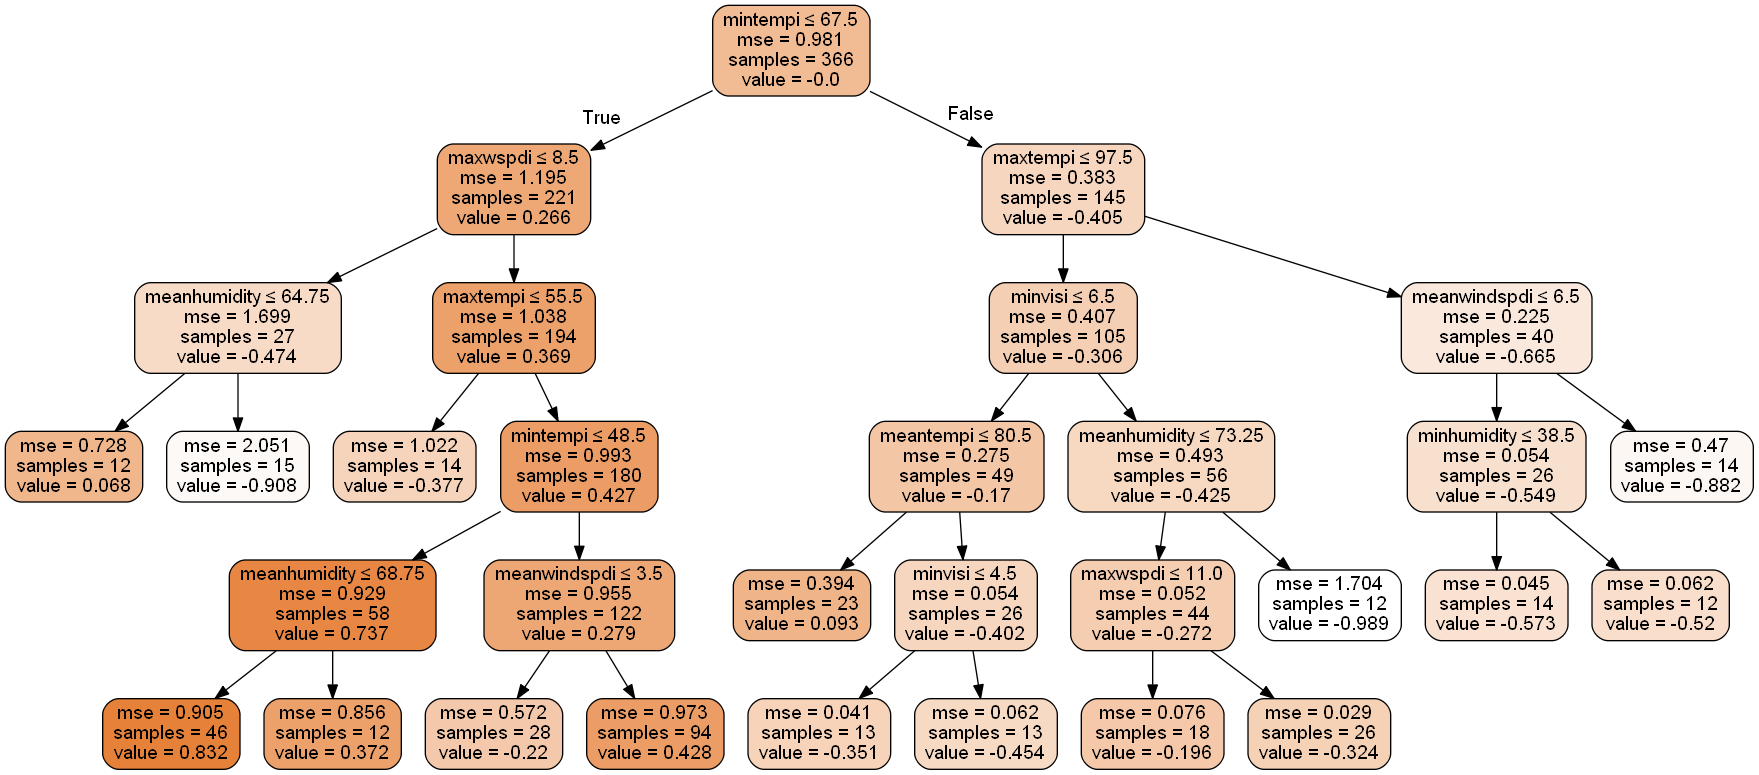

In [657]:
dot_data = StringIO()
export_graphviz(dtr_weather, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=list(X3))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Decision Tree 

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [498]:
md = 5
dtr = DecisionTreeRegressor(max_depth = md, min_samples_leaf=4)

dtr.fit(X_clean, y)

y_pred_tree = dtr.predict(X_clean)
mean_squared_error(y, y_pred_tree)

0.1293322432123982

In [499]:
explained_variance_score(y, y_pred_tree)

0.6657734492899541

In [500]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

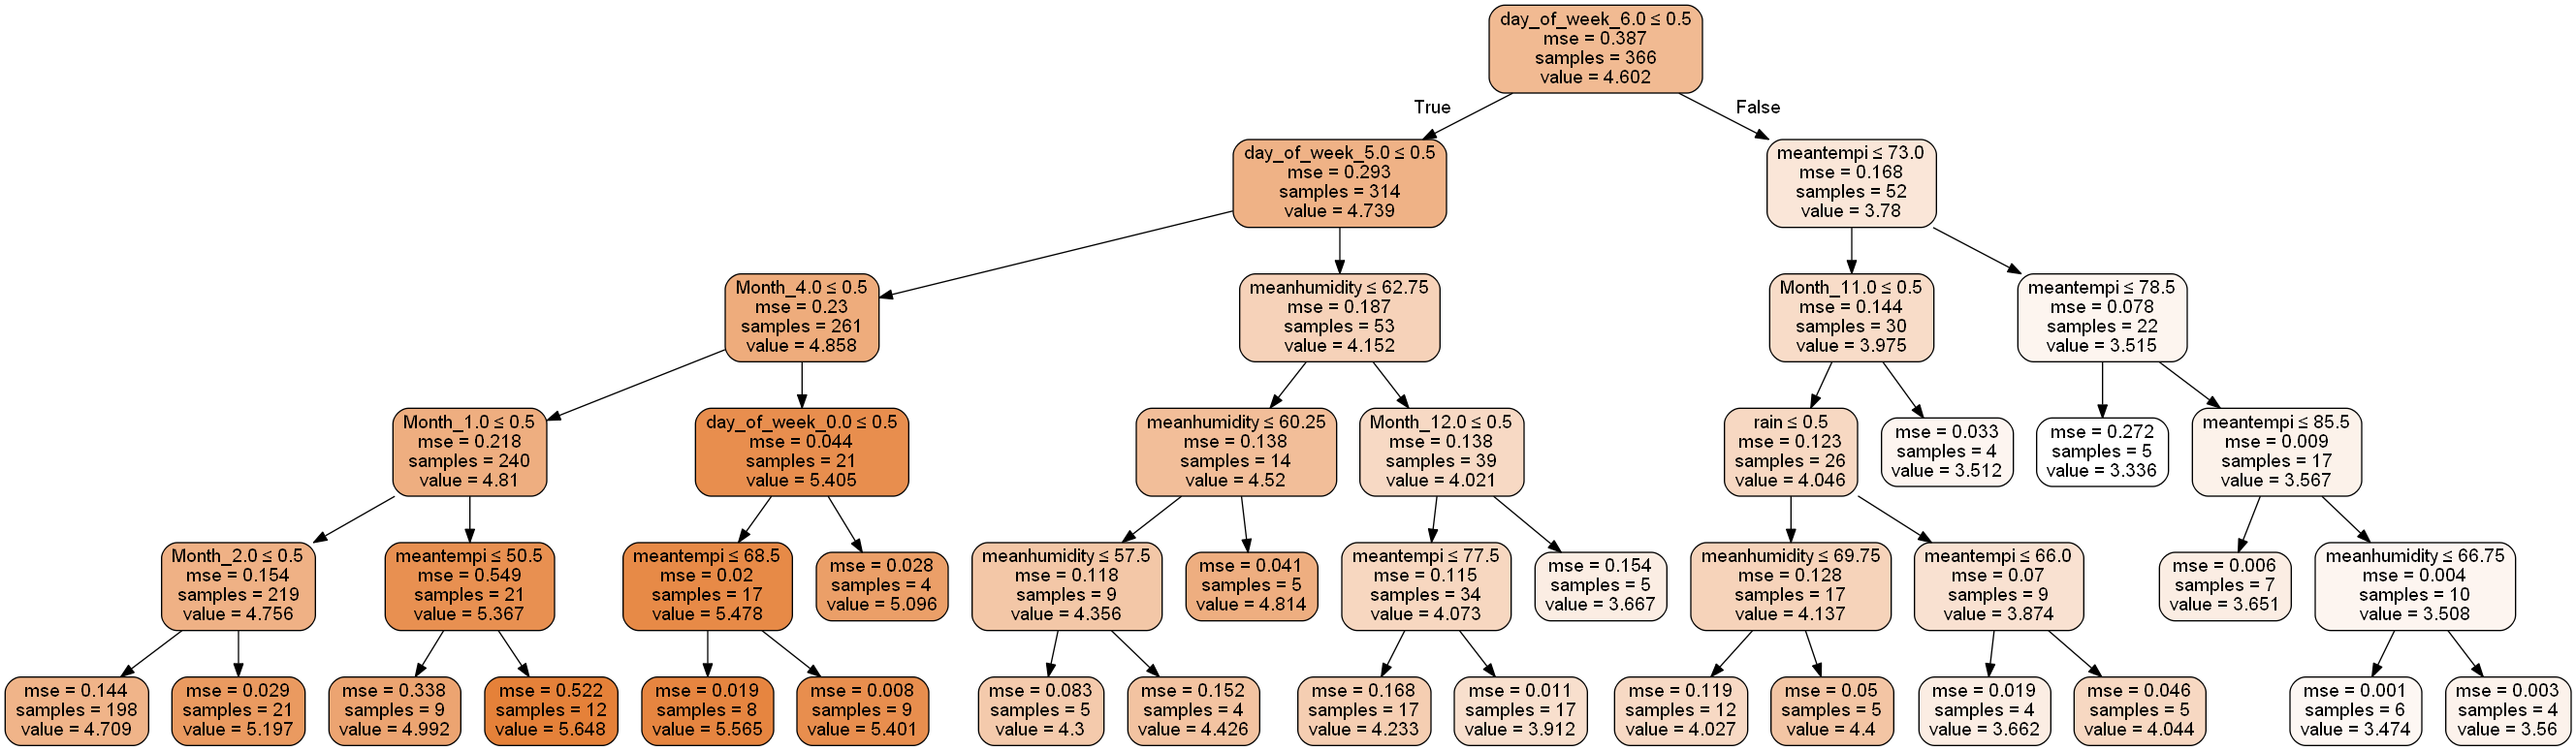

In [501]:
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=col_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [191]:
graph.write_png("dtr_tree_tw3_maxdepth"+str(md)+".png")

True

In [196]:
r2_list = []
mse_list = []
idx_list = []
r2 = 0

i = 1
while r2 < 0.99:
    md = i
    dtr = DecisionTreeRegressor(max_depth = md)
    dtr.fit(X_clean, y)
    y_pred_tree = dtr.predict(X_clean)
    mse = mean_squared_error(y, y_pred_tree)
    r2 = explained_variance_score(y, y_pred_tree)
    
    mse_list.append(mse)
    r2_list.append(r2)
    idx_list.append(i)
    
    i+=1

In [221]:
r_X = np.asarray(mse_list)
r_y = np.asarray(r2_list)

r2_plot_arr = np.concatenate([r_X.reshape(-1,1), r_y.reshape(-1,1)],axis=1)

In [222]:
r2_plot_arr

array([[0.27497951, 0.28938484],
       [0.2077791 , 0.46304734],
       [0.17511296, 0.54746473],
       [0.14612511, 0.62237652],
       [0.120871  , 0.68763941],
       [0.09899338, 0.74417658],
       [0.06958871, 0.82016553],
       [0.05795743, 0.85022365],
       [0.04252275, 0.89011069],
       [0.02054141, 0.94691592],
       [0.00907701, 0.97654275],
       [0.0029131 , 0.99247184]])

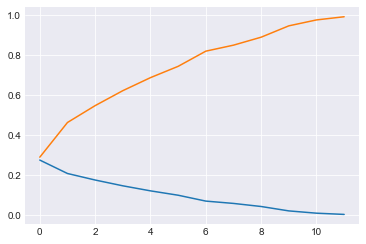

In [225]:
seaborn.set_style("darkgrid")
plt.plot(r2_plot_arr)
plt.show()

In [201]:
np.asarray(idx_list)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])